In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager

#Load Sample Clean Data

In [ ]:
from google.colab import files
file = files.upload()
sample_df = pd.read_csv('sampled_cardio_clean.csv')
sample_df.head()

Saving sampled_cardio_clean.csv to sampled_cardio_clean.csv


,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
0,48,2,166,70.0,150,90,1,1,0,0,0,1
1,45,2,170,92.0,125,85,1,1,0,0,1,0
2,63,1,151,55.0,130,80,1,1,0,0,1,0
3,52,2,168,85.0,110,70,1,1,0,1,1,0
4,49,1,165,82.0,110,80,1,1,0,0,1,0


#Numeric Varibles vs. Heart Disease

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


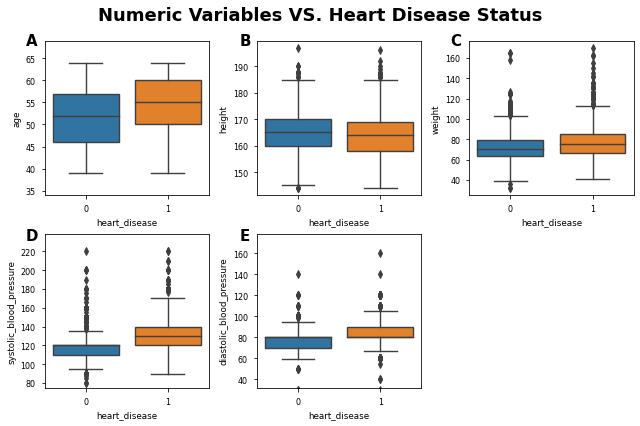

In [ ]:

plt.style.use('seaborn-paper')

category_col = ['gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'physical_activity', 'heart_disease']
sample_df[category_col] = sample_df[category_col].astype('category')
numeric_col = sample_df._get_numeric_data().columns

plt.rcParams["font.family"] = "Times New Roman"
fig, axes = plt.subplots(2, 3, figsize=(9,6))
count = 0
for numeric in numeric_col:
 i, j = divmod(count, 3)
 sns.boxplot(data=sample_df, x='heart_disease', y=numeric, ax=axes[i, j])
 count += 1
fig.delaxes(axes[1][2])
plt.tight_layout()

plt.suptitle('Numeric Variables VS. Heart Disease Status', weight='bold', fontsize=18)
plt.subplots_adjust(top=0.9)

fig.text(0.045, 0.9, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.375, 0.9, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.70, 0.9, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.045, 0.45, "D", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.375, 0.45, "E", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)

axes[0][0].set_ylim([34,69])
axes[1][0].set_ylim([75,239])
axes[1][1].set_ylim([32, 179])
plt.savefig('numeric_vs_heart')



###Insights
- Old people 
- Low height
- High weight
- Normal pressure range for subjects who having no heart disease
- Abnormal pressure range for subjects who have heart disease

We need to find the quantitive value to symbolize the exact amplititude.

#Category Varibles vs. Heart Disease

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


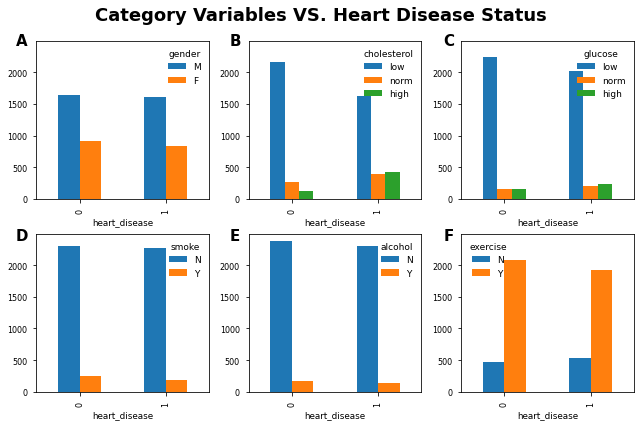

In [ ]:
sample_df.head()
category_df = sample_df[category_col]
plt.style.use('seaborn-paper')

plt.rcParams.update({'font.family':'Verdana'})
fig, axes = plt.subplots(2, 3, figsize=(9,6))
count = 0
for cat_val in category_col:
  if cat_val == 'heart_disease': 
    continue
  i, j = divmod(count, 3)
  temp_df = category_df.loc[:, [cat_val, 'heart_disease']]  # df[['gender', 'heart_disease']]
  temp_df = temp_df.groupby([cat_val, 'heart_disease']).size().reset_index(name='count')
  pivot_df = pd.pivot_table(temp_df, values='count', index='heart_disease', columns=cat_val)
  pivot_df.plot(kind='bar', ax=axes[i, j], ylim=(0,2499))
  count += 1

plt.tight_layout()
axes[0][0].legend(title='gender', labels=['M', 'F'], title_fontsize=9, fontsize=9, loc=1, frameon=False).get_frame().set_linewidth(0.0)
axes[0][1].legend(title='cholesterol', labels=['low', 'norm', 'high'], title_fontsize=9, fontsize=9, loc=1, frameon=False).get_frame().set_linewidth(0.0)
axes[0][2].legend(title='glucose', labels=['low', 'norm', 'high'], title_fontsize=9, fontsize=9, loc=1, frameon=False).get_frame().set_linewidth(0.0)
axes[1][0].legend(title='smoke', labels=['N', 'Y'], title_fontsize=9, fontsize=9, loc=1, frameon=False).get_frame().set_linewidth(0.0)
axes[1][1].legend(title='alcohol', labels=['N', 'Y'], title_fontsize=9, fontsize=9, loc=1, frameon=False).get_frame().set_linewidth(0.0)
axes[1][2].legend(title='exercise', labels=['N', 'Y'], title_fontsize=9, fontsize=9, loc=2, frameon=False).get_frame().set_linewidth(0.0)

print(plt.style.available)
fig.text(0.03, 0.9, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.36, 0.9, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.69, 0.9, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.03, 0.45, "D", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.36, 0.45, "E", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.69, 0.45, "F", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)

plt.suptitle('Category Variables VS. Heart Disease Status', weight='bold', fontsize=18)
plt.subplots_adjust(top=0.9)

plt.savefig('categroy_vs_heart')